<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/A%C3%A7%C3%B5es_Analises3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==0.25.3 # Resolve a compatibilidade com o pyfolio - é necessário o restart do Runtime.
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
!pip install pyfolio
import pyfolio as pf #bugged
import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)
     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=95ee1ba3612e2647aa24cc549da686e0c53c7822ca4ab0fa574f0df48e58e212
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=55cf68c0db9d3daeddf93ca3790666b92b621137e98ac86b6017f345b84ad2df
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
tickers = ["ITUB3.SA","ITUB4.SA", "ITSA3.SA", "ITSA4.SA", "^BVSP"]
portfolio = yf.download(tickers, period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed


In [3]:
portfolio

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,^BVSP
Date,,,,,
2015-05-15,5.744842,5.745818,15.340974,17.144880,57249.0
2015-05-18,5.614683,5.674369,15.108614,16.688807,56204.0
2015-05-19,5.715263,5.585057,14.932187,16.454126,55499.0
2015-05-20,5.472691,5.531469,14.785815,16.161922,54901.0
2015-05-21,5.502274,5.519561,14.519016,15.967110,55112.0
...,...,...,...,...,...
2020-05-11,10.060000,8.420000,21.709999,22.379999,79065.0
2020-05-12,9.670000,8.180000,20.900000,21.610001,77872.0
2020-05-13,9.990000,8.220000,20.850000,21.600000,77772.0


In [4]:
portfolio_returns = portfolio.pct_change()
portfolio_returns.iloc[0] = 0
portfolio_returns

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,^BVSP
Date,,,,,
2015-05-15,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-18,-0.022657,-0.012435,-0.015146,-0.026601,-0.018254
2015-05-19,0.017914,-0.015740,-0.011677,-0.014062,-0.012544
2015-05-20,-0.042443,-0.009595,-0.009802,-0.017759,-0.010775
2015-05-21,0.005406,-0.002153,-0.018044,-0.012054,0.003843
...,...,...,...,...,...
2020-05-11,-0.012758,-0.008245,0.017338,0.002688,-0.014926
2020-05-12,-0.038767,-0.028504,-0.037310,-0.034406,-0.015089
2020-05-13,0.033092,0.004890,-0.002392,-0.000463,-0.001284


In [5]:
portfolio_normalized = ( 1 + portfolio_returns).cumprod()
portfolio_normalized

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,^BVSP
Date,,,,,
2015-05-15,1.000000,1.000000,1.000000,1.000000,1.000000
2015-05-18,0.977343,0.987565,0.984854,0.973399,0.981746
2015-05-19,0.994851,0.972021,0.973353,0.959711,0.969432
2015-05-20,0.952627,0.962695,0.963812,0.942668,0.958986
2015-05-21,0.957776,0.960622,0.946421,0.931305,0.962672
...,...,...,...,...,...
2020-05-11,1.751136,1.465414,1.415164,1.305346,1.381072
2020-05-12,1.683249,1.423644,1.362365,1.260435,1.360233
2020-05-13,1.738951,1.430606,1.359105,1.259851,1.358487


In [0]:
portfolio_applied = 10000 * portfolio_normalized
portfolio_applied["Results"] = portfolio_applied.iloc[:, :4].sum(axis=1)
portfolio_applied["Returns"] = portfolio_applied["Results"].pct_change()

In [0]:
portfolio_ITSA = portfolio_applied.iloc[:, [1,2]]
portfolio_ITSA["Results"] = portfolio_ITSA.sum(axis=1)
portfolio_ITSA["Returns"] = portfolio_ITSA["Results"].pct_change()

In [0]:
portfolio_ITUB = portfolio_applied.iloc[:,[3,4]]
portfolio_ITUB["Results"] = portfolio_ITUB.sum(axis=1)
portfolio_ITUB["Returns"] = portfolio_ITUB["Results"].pct_change()

In [9]:
portfolio_applied["ReturnsITSA"] = portfolio_ITSA["Returns"]
portfolio_applied["ReturnsITUB"] = portfolio_ITUB["Returns"]
portfolio_applied.columns = ['ITASA3.SA','ITASA4.SA','ReturnsITSA','ITUB3.SA','ITUB4.SA','ReturnsITUB','Results','Returns','^BVSP']
portfolio_applied.head()

,ITASA3.SA,ITASA4.SA,ReturnsITSA,ITUB3.SA,ITUB4.SA,ReturnsITUB,Results,Returns,^BVSP
Date,,,,,,,,,
2015-05-15,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000,NaN,NaN,NaN
2015-05-18,9773.434267,9875.651595,9848.536417,9733.988367,9817.464061,39231.610646,-0.019210,-0.013791,-0.022427
2015-05-19,9948.512617,9720.212354,9733.532709,9597.107752,9694.317805,38999.365433,-0.005920,-0.013711,-0.013300
2015-05-20,9526.268932,9626.948976,9638.120356,9426.675589,9589.861832,38218.013854,-0.020035,-0.009699,-0.014249
2015-05-21,9577.764615,9606.224242,9464.207686,9313.048214,9626.718371,37961.244757,-0.006719,-0.010103,-0.004037


Start date,2015-05-15
End date,2020-05-15
Total months,59
,Backtest
Annual return,5.6%
Cumulative returns,30.8%
Annual volatility,29.5%
Sharpe ratio,0.33
Calmar ratio,0.12
Stability,0.83
Max drawdown,-45.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,45.79,2020-01-02,2020-03-23,NaT,NaN
1,33.02,2015-05-15,2016-01-20,2016-07-20,309
2,24.99,2018-02-26,2018-06-18,2018-11-16,190
3,15.81,2016-10-31,2016-12-19,2017-01-23,61
4,14.50,2019-02-04,2019-05-16,2019-07-05,110


Stress Events,mean,min,max
Fall2015,-0.07%,-3.29%,4.67%
New Normal,0.04%,-12.27%,12.43%


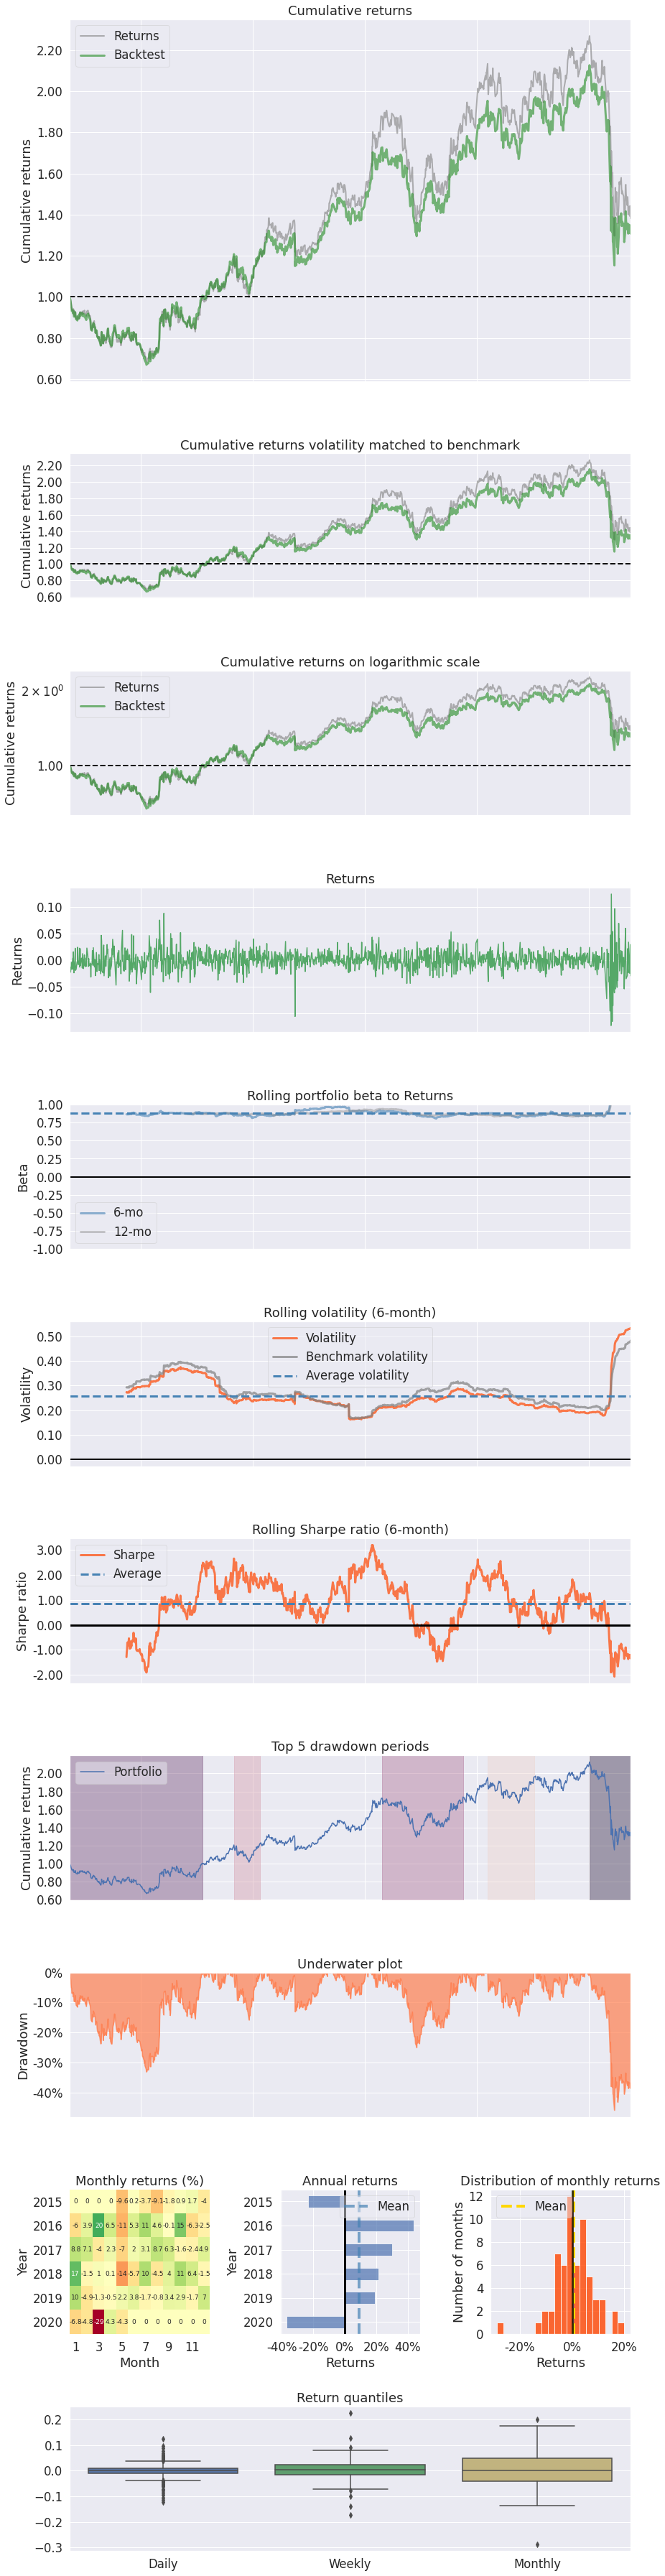

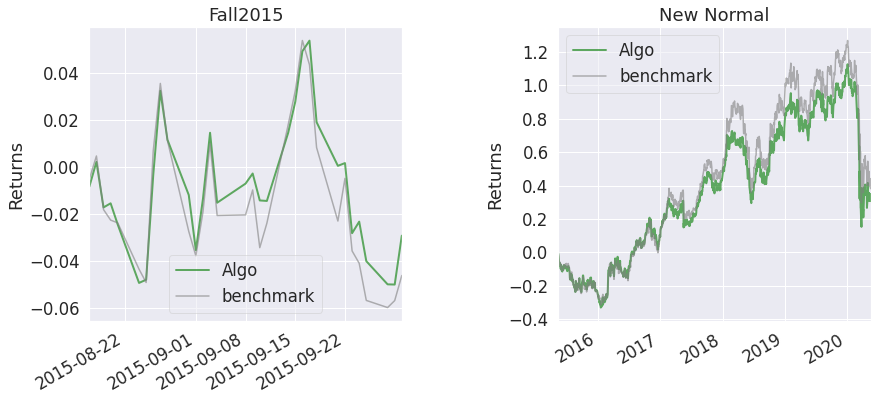

In [10]:
pf.create_full_tear_sheet(portfolio_ITUB["Returns"], benchmark_rets=portfolio_ITSA["Returns"])

Start date,2015-05-15
End date,2020-05-15
Total months,59
,Backtest
Annual return,6.8%
Cumulative returns,38.1%
Annual volatility,30.2%
Sharpe ratio,0.37
Calmar ratio,0.16
Stability,0.85
Max drawdown,-42.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,42.85,2020-01-02,2020-03-23,NaT,NaN
1,31.36,2015-05-15,2016-01-21,2016-08-03,319
2,28.78,2018-03-12,2018-06-18,2018-11-28,188
3,16.90,2019-02-04,2019-05-17,2019-10-23,188
4,16.71,2016-10-31,2016-12-19,2017-01-23,61


Stress Events,mean,min,max
Fall2015,-0.12%,-3.82%,5.89%
New Normal,0.04%,-10.49%,10.51%


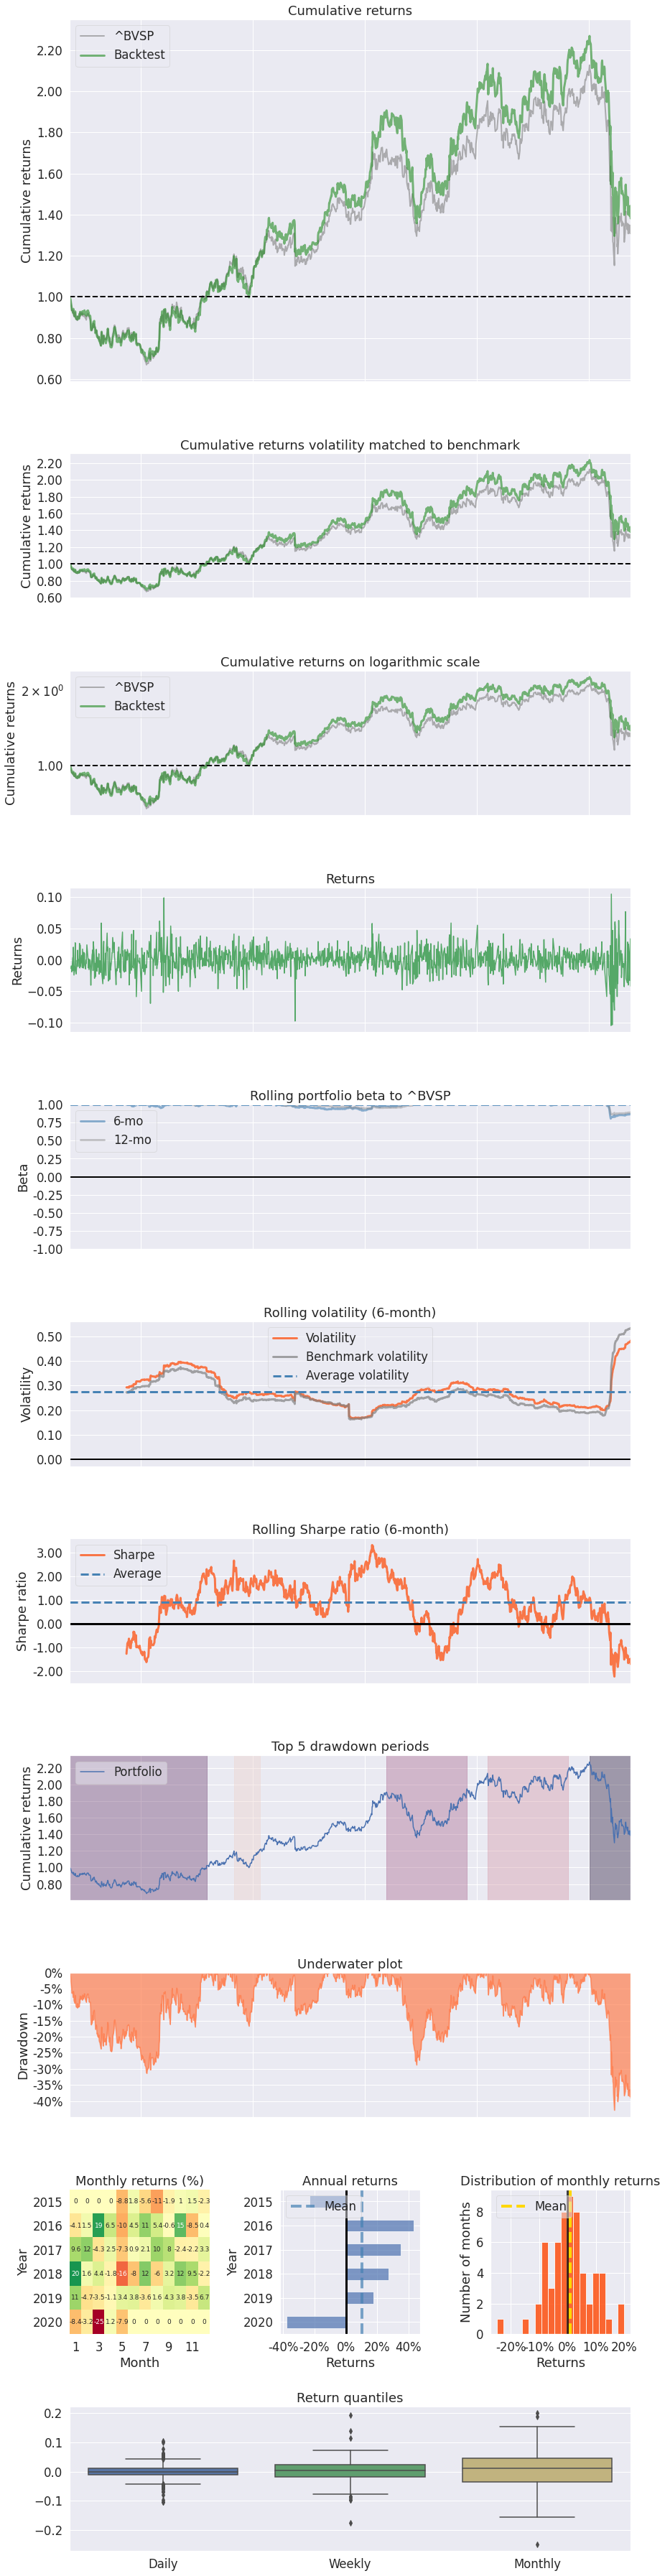

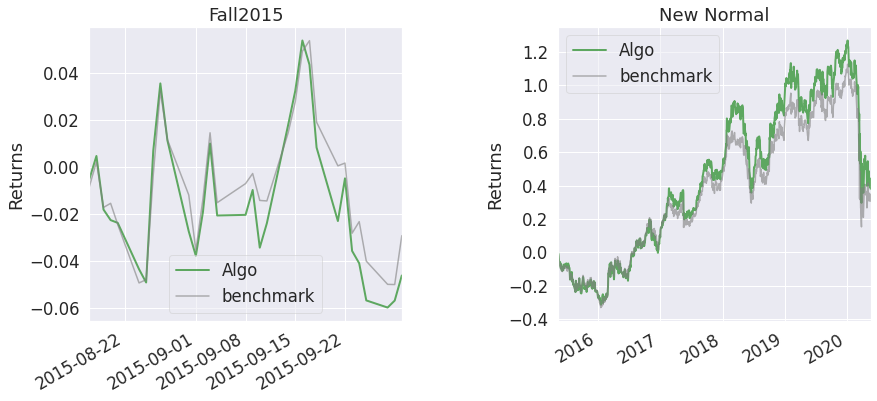

In [11]:
pf.create_full_tear_sheet(portfolio_applied["Returns"], benchmark_rets=portfolio_applied["^BVSP"])

In [0]:
import urllib.request
import urllib.parse
import re

query_string = urllib.parse.urlencode({"search_query" : input("Type search query and hit enter: ")})
html_content = urllib.request.urlopen("http://www.youtube.com/results?" + query_string)
search_results = re.findall(r'href=\"\/watch\?v=(.{11})', html_content.read().decode())
print("http://www.youtube.com/watch?v=" + search_results[0])

Type search query and hit enter: Sarah Brightman & Andrea Bocelli
http://www.youtube.com/watch?v=g3ENX3aHlqU
